In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


TASK 2: DECISION TREE CLASSIFICATION - IRIS DATASET

[STEP 1] Loading Iris Dataset from Kaggle...
✓ Dataset loaded successfully!
  - Total samples: 150
  - Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150

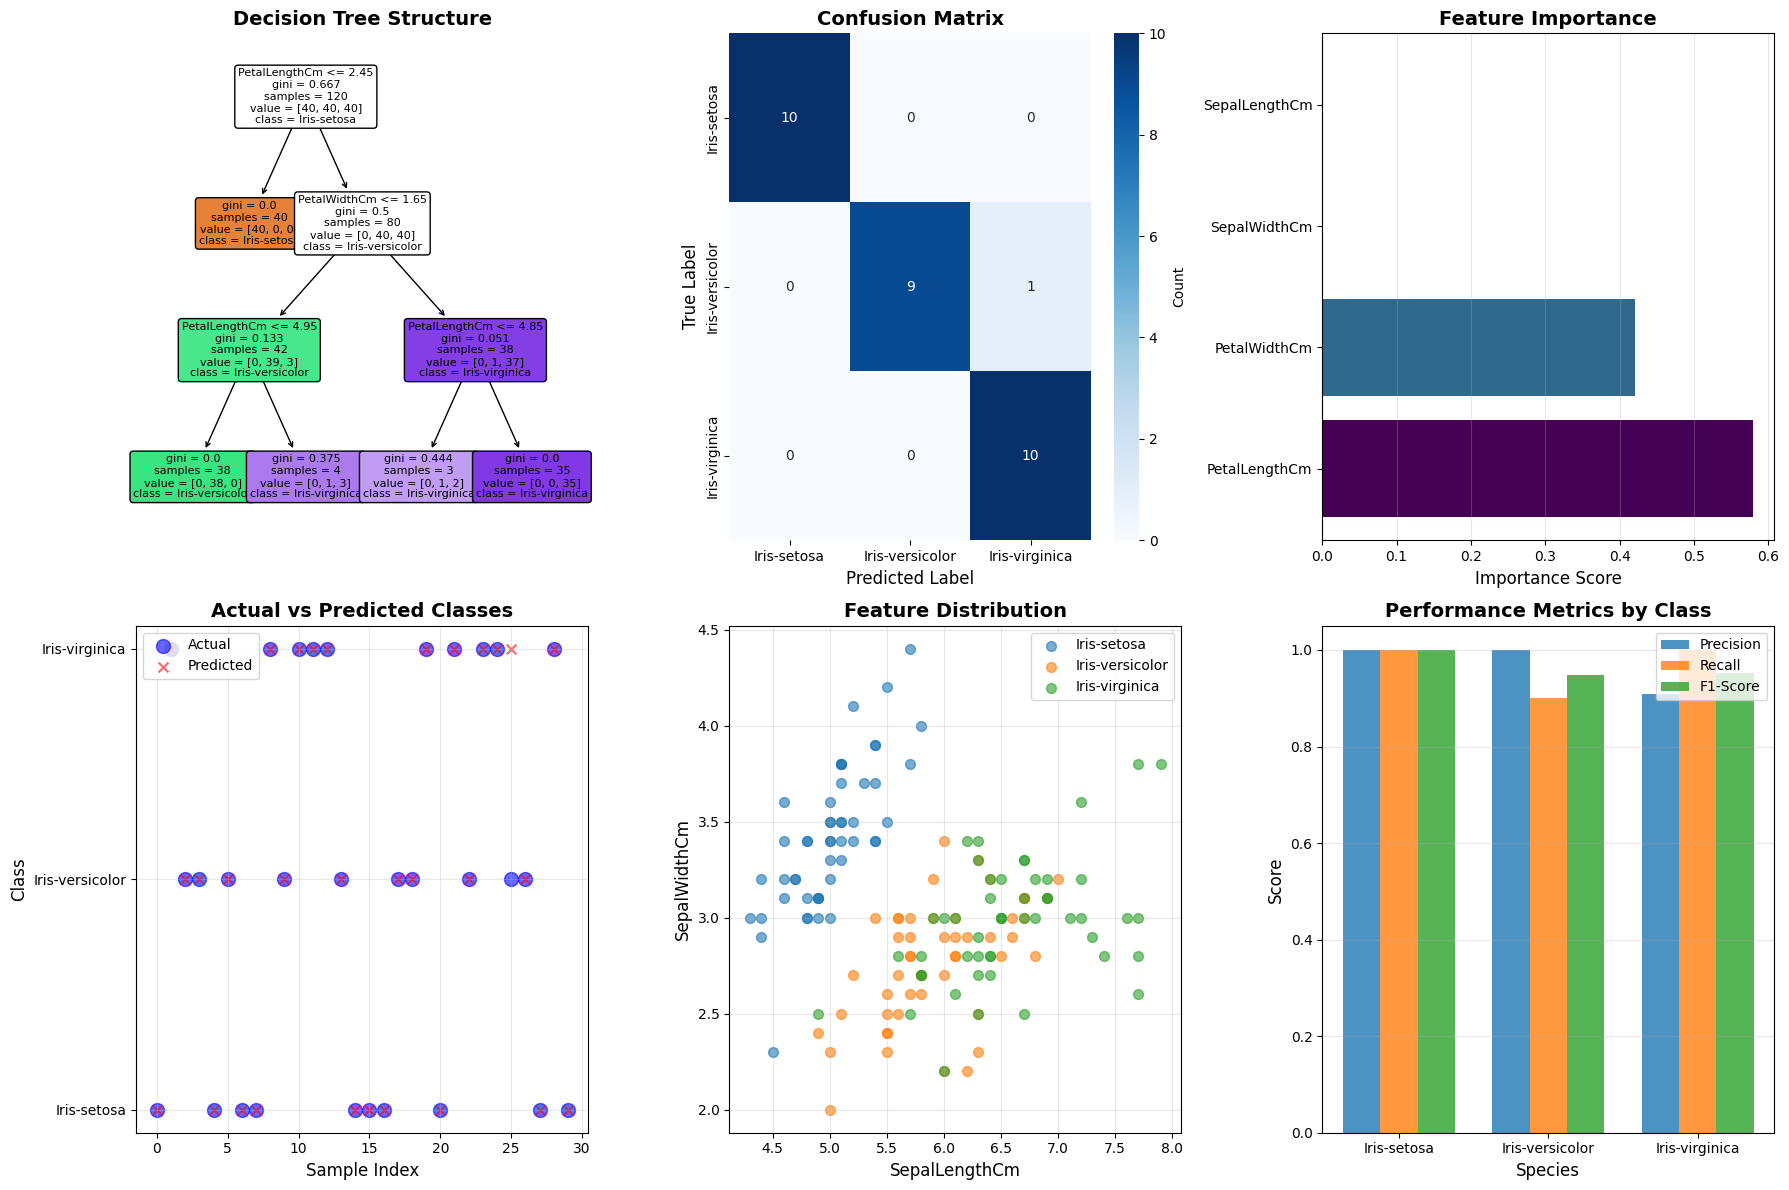


[STEP 8] Saving model...
✓ Model saved as 'decision_tree_classifier_model.pkl'
✓ Label encoder saved as 'label_encoder.pkl'
✓ Feature names saved as 'feature_names.pkl'

[STEP 9] Testing with sample predictions...

Sample Predictions:
----------------------------------------------------------------------
Sample 1:
  Features: [4.4 3.  1.3 0.2]
  Predicted: Iris-setosa
  Actual: Iris-setosa
  Probabilities:
    Iris-setosa: 1.0000 (100.00%)
    Iris-versicolor: 0.0000 (0.00%)
    Iris-virginica: 0.0000 (0.00%)
----------------------------------------------------------------------
Sample 2:
  Features: [6.1 3.  4.9 1.8]
  Predicted: Iris-virginica
  Actual: Iris-virginica
  Probabilities:
    Iris-setosa: 0.0000 (0.00%)
    Iris-versicolor: 0.0000 (0.00%)
    Iris-virginica: 1.0000 (100.00%)
----------------------------------------------------------------------
Sample 3:
  Features: [4.9 2.4 3.3 1. ]
  Predicted: Iris-versicolor
  Actual: Iris-versicolor
  Probabilities:
    Iris-setosa

In [3]:
# TASK 2: Decision Tree Classification - Iris Dataset
# Run this in your Kaggle notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

print("="*60)
print("TASK 2: DECISION TREE CLASSIFICATION - IRIS DATASET")
print("="*60)

# ===== STEP 1: Load Dataset from Kaggle =====
print("\n[STEP 1] Loading Iris Dataset from Kaggle...")

# Load the CSV file (adjust path if needed)
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

print(f"✓ Dataset loaded successfully!")
print(f"  - Total samples: {len(df)}")
print(f"  - Columns: {list(df.columns)}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass distribution:")
print(df['Species'].value_counts())

# ===== STEP 2: Prepare Features and Target =====
print("\n[STEP 2] Preparing features and target...")

# Drop ID column if exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Features (X) and Target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Encode target labels to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")
print(f"✓ Classes: {list(le.classes_)}")

# ===== STEP 3: Split Dataset (80% train, 20% test) =====
print("\n[STEP 3] Splitting dataset into train and test...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✓ Training samples: {len(X_train)}")
print(f"✓ Test samples: {len(X_test)}")

# ===== STEP 4: Train Decision Tree Classifier =====
print("\n[STEP 4] Training Decision Tree Classifier...")

dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

dt_classifier.fit(X_train, y_train)
print("✓ Model trained successfully!")

# ===== STEP 5: Make Predictions =====
print("\n[STEP 5] Making predictions...")
y_pred = dt_classifier.predict(X_test)

# ===== STEP 6: Evaluate Model =====
print("\n[STEP 6] Model Evaluation:")
print("="*60)

train_accuracy = dt_classifier.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ===== STEP 7: Visualizations =====
print("\n[STEP 7] Creating visualizations...")

fig = plt.figure(figsize=(18, 12))

# 1. Decision Tree Structure
ax1 = plt.subplot(2, 3, 1)
plot_tree(dt_classifier, 
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
ax1.set_title('Decision Tree Structure', fontsize=14, fontweight='bold')

# 2. Confusion Matrix
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})
ax2.set_xlabel('Predicted Label', fontsize=12)
ax2.set_ylabel('True Label', fontsize=12)
ax2.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 3. Feature Importance
ax3 = plt.subplot(2, 3, 3)
feature_importance = dt_classifier.feature_importances_
indices = np.argsort(feature_importance)[::-1]
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))

bars = ax3.barh(range(len(feature_importance)), 
                feature_importance[indices],
                color=colors)
ax3.set_yticks(range(len(feature_importance)))
ax3.set_yticklabels([X.columns[i] for i in indices])
ax3.set_xlabel('Importance Score', fontsize=12)
ax3.set_title('Feature Importance', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# 4. Actual vs Predicted
ax4 = plt.subplot(2, 3, 4)
x_axis = np.arange(len(y_test))
ax4.scatter(x_axis, y_test, color='blue', label='Actual', alpha=0.6, s=100, marker='o')
ax4.scatter(x_axis, y_pred, color='red', label='Predicted', alpha=0.6, s=50, marker='x')
ax4.set_xlabel('Sample Index', fontsize=12)
ax4.set_ylabel('Class', fontsize=12)
ax4.set_title('Actual vs Predicted Classes', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_yticks([0, 1, 2])
ax4.set_yticklabels(le.classes_)

# 5. Pairplot of features (first 2 features)
ax5 = plt.subplot(2, 3, 5)
for i, species in enumerate(le.classes_):
    mask = y_encoded == i
    ax5.scatter(X.iloc[mask, 0], X.iloc[mask, 1], 
               label=species, alpha=0.6, s=50)
ax5.set_xlabel(X.columns[0], fontsize=12)
ax5.set_ylabel(X.columns[1], fontsize=12)
ax5.set_title('Feature Distribution', fontsize=14, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Accuracy by class
ax6 = plt.subplot(2, 3, 6)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

x = np.arange(len(le.classes_))
width = 0.25

ax6.bar(x - width, precision, width, label='Precision', alpha=0.8)
ax6.bar(x, recall, width, label='Recall', alpha=0.8)
ax6.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax6.set_xlabel('Species', fontsize=12)
ax6.set_ylabel('Score', fontsize=12)
ax6.set_title('Performance Metrics by Class', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(le.classes_)
ax6.legend()
ax6.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===== STEP 8: Save Model =====
print("\n[STEP 8] Saving model...")

with open('decision_tree_classifier_model.pkl', 'wb') as f:
    pickle.dump(dt_classifier, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

print("✓ Model saved as 'decision_tree_classifier_model.pkl'")
print("✓ Label encoder saved as 'label_encoder.pkl'")
print("✓ Feature names saved as 'feature_names.pkl'")

# ===== STEP 9: Test with Sample Data =====
print("\n[STEP 9] Testing with sample predictions...")

sample = X_test.iloc[:3]  # Take first 3 test samples
predictions = dt_classifier.predict(sample)
probabilities = dt_classifier.predict_proba(sample)

print("\nSample Predictions:")
print("-" * 70)
for i in range(len(sample)):
    actual_value = y_test[i]
    print(f"Sample {i+1}:")
    print(f"  Features: {sample.iloc[i].values}")
    print(f"  Predicted: {le.classes_[predictions[i]]}")
    print(f"  Actual: {le.classes_[actual_value]}")
    print(f"  Probabilities:")
    for j, prob in enumerate(probabilities[i]):
        print(f"    {le.classes_[j]}: {prob:.4f} ({prob*100:.2f}%)")
    print("-" * 70)

